# Machine Learning & Statistics Assessment 

#### Boston-House-Prices
In this assessment I plan to upload and view the Boston House Prices dataset and analyse using descriptive statistics and plots. I will also use inferential statistics to analyse whether there is a significant difference in the median house prices between houses that are along the Charles river and those that aren't. Finally I hope to use keras to create a neural network that can predict the median house price based on the other variables in the dataset.

I have laid out the below notebook in the following steps:

1) A description of the Python libraries used to help with the assignment.

2) A description of the Boston House Prices dataset explaining what it is and what the variables are.

3) A look at the descriptive statistics of the dataset.

4) Selecting a smaller number of variables to have a closer look at their distributions and relationships.

5) Using inferential statistics to examine if there is a significant difference in the median house prices between houses on and off the Charles River. 

6) Create a neural network using keras that can predict the median house price based on the other variables in the dataset.

7) Conculsions on the assignment.

8) A list of the references used in completing the assignment.

#### The Python Libraries to be used
Pandas is a package providing fast, flexible and expressive data structures designed to make working with data both easy and initutive.

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Numpy is the fundamental package for scientific computing with Python. Besides it's scientific uses it can also be used as an efficient multi-dimensional container of generic data.

Seaborn is a Python data visualizition library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Scikit-learn is a Python library for machine learning built on top of Numpy and some other packages.

Statsmodel is a powerful Python pachage for the estimation of statistical models, performing tests and more.

Keras is a high-level neural networks API written on Python and capable of running on top of TensorFlow. It was developed with a focus on enabling fast experimentation.

TensorFlow is a Python-friendly open source library for numerical computation that makes machine learning faster and easier.

In [1]:
import numpy as np   # For numerical arrays
import pandas as pd  # For dataframes
from pandas import DataFrame
from sklearn import metrics # For loss score and utility functions to measure performance
import sklearn.preprocessing as pre # For preprocessing data
import sklearn.model_selection as mod # For whitening
import sklearn.decomposition as dec # For splitting data sets
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For plotting graphs
import scipy.stats as stats # For statistical functions
import statsmodels.api as sm # For estimating different statistics models
import keras as kr # For neural netwoks
from keras.models import Sequential  # For creating models layer by layer
from keras.layers import Dense # For adding neurons 
import tensorflow as tf # For numerical computation

Using TensorFlow backend.


#### The Dataset

The Boston House Prices data in this project was collected in 1978 by the US Census Service concerning housing in the area of Boston. It contains 506 enteries representing aggregate information about 14 features of homes from various suburbs in Boston. The dataset is accessible through the Python SKlearn library. 

In [2]:
from sklearn.datasets import load_boston # Importing the Boston House Dataset
boston_dataset = load_boston() # Assigning the dataset a reference

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # Iniatilizing the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target # Including the Median House Price (MEDV) data in the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.describe() # A look at the statistics of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Understanding the data
A breakdown of the different variables within the dataset keeping in mind each record in the database describes a Boston suburb or town.

CRIM per capita crime rate by town.

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town.

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX nitric oxides concentration (parts per 10 million).

RM average number of rooms per dwelling.

AGE proportion of owner-occupied units built prior to 1940.

DIS weighted distances to five Boston employment centres.

RAD index of accessibility to radial highways.

TAX full-value property-tax rate per 10,000usd.

PTRATIO pupil-teacher ratio by town.

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT % lower status of the population.

MEDV median value of owner-occupied homes in $1000s

### Descriptive Statisics
#### A look at the corroleation between the variables

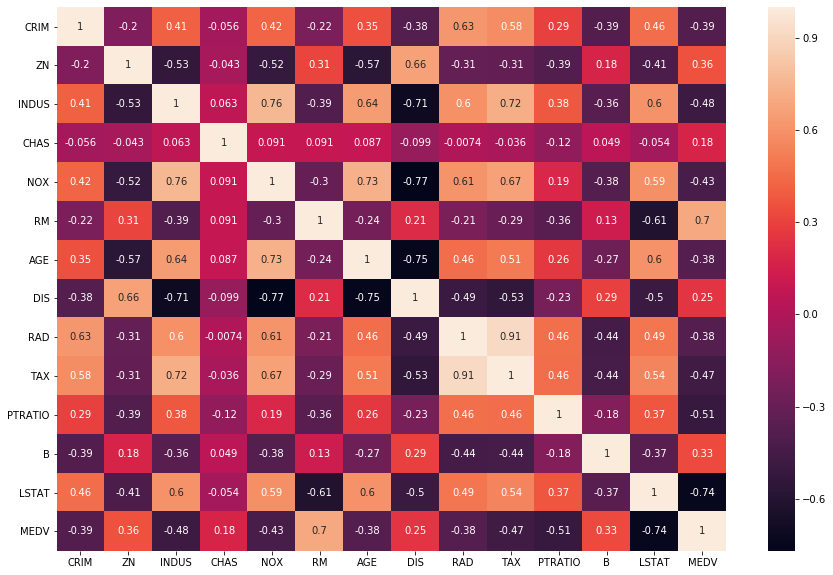

In [6]:
correlation_matrix = boston.corr()  
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

Using a correlation matrix it's possible to measure the linear relationships between the variables within the dataset. The correlation cofficient ranges from -1 to 1. This indicates varibales with a strong positive correlation will be nearer to 1 and those with a negative correlation will be closer to -1.

The number of rooms per house (RM) has the closest positive correlation with the median house price (MEDV) 0.7. The variable with the most negative correlation to MEDV is the percentage lower status of the population (LSTAT).

#### Drawing Assumptions

Looking at the correlation matrix we can draw various assumptions about the relationships between the different variables.
For example the strong positive correlation between the median house price and the number of rooms per house would follow the common logic that the more rooms in a house the higher the price of that house. The strong negativve correlation betwwen the MEDV and LSTAT wuld follow the common logic that people in poorer lower income areas will be living in lower cost housing.

#### Simplyifing the dataset for a quick look at the descriptive statistics

There are 14 different variables within this data set. For the purpose of this project I will have a closer look at MEDV as the dependant variable, RM as the variable with the cloest positve correlation with MEDV, LSTAT as the variable with the closest negative correlation with MEDV and CHAS as this will be investigated further as per the project guidelines.

MEDV - Median value of owner occuied homes. I will use this as the dependent variable and the one that I will compare the other selected variables to.

LSTAT - % lower status of population.

CHAS - If houses have boundries along the Charles river or not.

RM - Average number of rooms per dwelling.

In [7]:
boston1 = boston.loc[:, ["LSTAT", "CHAS", "RM", "MEDV"]] # Tidying up the data to focus on the four variables I mentioned above.
boston1.head(10) 

,LSTAT,CHAS,RM,MEDV
0,4.98,0.0,6.575,24.0
1,9.14,0.0,6.421,21.6
2,4.03,0.0,7.185,34.7
3,2.94,0.0,6.998,33.4
4,5.33,0.0,7.147,36.2
5,5.21,0.0,6.430,28.7
6,12.43,0.0,6.012,22.9
7,19.15,0.0,6.172,27.1
8,29.93,0.0,5.631,16.5
9,17.10,0.0,6.004,18.9


#### A look at the Data Distribution

In [8]:
sns.set(rc={'figure.figsize':(10,5.27)}) # Setting the size of the plots

Text(0.5, 1.0, 'Distribution of the Median Value of Houses')

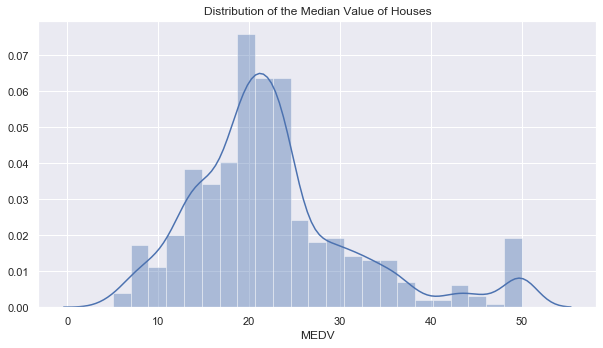

In [9]:
sns.distplot(boston1['MEDV'])
plt.title ("Distribution of the Median Value of Houses")

The distribution of the MEDV is a normal distribution with a slight outlier at the more expensive median house price end of the scale. This indicates that the median house prices in the majority of the towns/suburbs is the same and then there are a smaller number of towns where the prices are lower and the same with higher prices although at the extreme end of the scale there are quite a few towns and suburbs where the median price is very high.

Text(0.5, 1.0, 'Distribution of % of Lower Status Population')

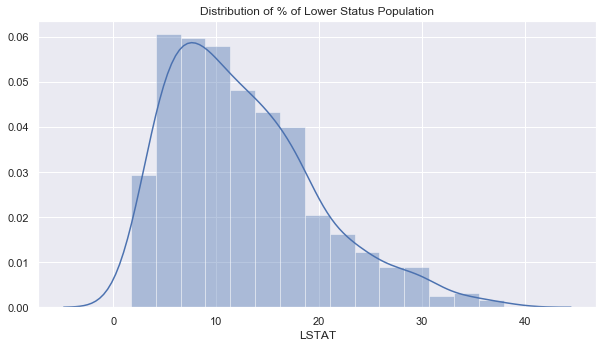

In [10]:
sns.distplot(boston1['LSTAT'])
plt.title ("Distribution of % of Lower Status Population")

The distribution of the LSTAT is a sort of gamma distribution with the results skewed one side indicating that the number of poorer working class people must be more concentrated in a specific number of towns with other towns having a significantly lower number of poorer working class.

Text(0.5, 1.0, 'Distribution of Number of Houses with River Boundaries by Town')

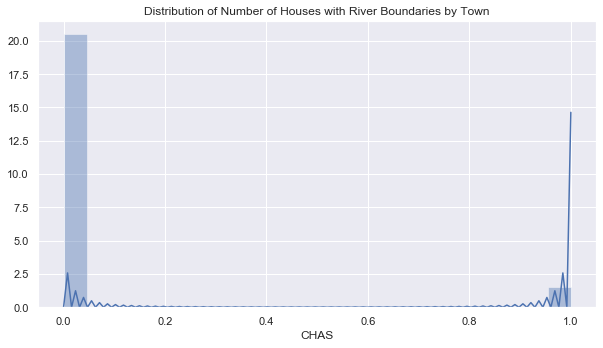

In [11]:
sns.distplot(boston1['CHAS'])
plt.title ("Distribution of Number of Houses with River Boundaries by Town")

The CHAS variable only has two values, 1 if on the river or 0 if not on the river so there is no real value in this graph other than the fact it clearly shows there are a lot more houses not on the river than the ones that are on the river.

Text(0.5, 1.0, 'Distribution of Average Number of Rooms per House by Town')

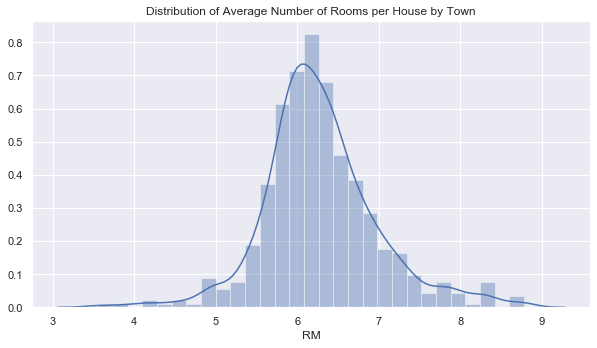

In [12]:
sns.distplot(boston1['RM'])
plt.title ("Distribution of Average Number of Rooms per House by Town")

Like the MEDV, the RM distribution is normal. Again this would indicate the majority of houses in each town/suburb have a median number of rooms tapering off at both sides to indicate a much smaller number of houses with fewer rooms while also a a much smaller number of houses with many rooms. The same distribution as MEDV could indicate a possible relationship between the median house price and the number of rooms in a house.

#### A look at the relationships of the variables

Text(0.5, 1, 'Relationship between Median House Price and Areas of Poorer Working Class')

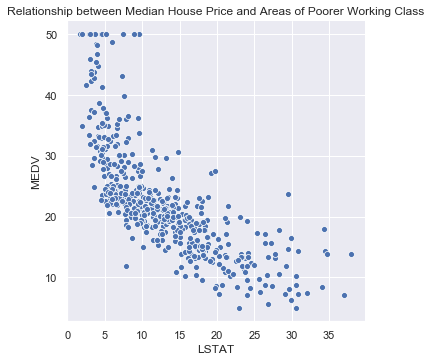

In [13]:
sns.relplot(x="LSTAT", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Areas of Poorer Working Class")

Looking at this plot the data there appears to be a relationship where the areas where there are a higher concentration of poorer working class people tend to be in areas where the MEDV is lower. This would make sense from a practical point of view as people on from poorer lower income areas would not be able to afford higher priced houses. 

Text(0.5, 1, 'Relationship between Median House Price and Houses on or off the Charles River')

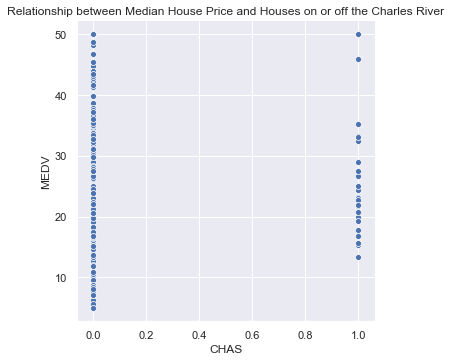

In [14]:
sns.relplot(x="CHAS", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Houses on or off the Charles River")

Looking at this plot does not tell too much about the relationship between the MEDV and houses on/off the Charles River other than that both appear to have a nice even spread along the MEDV price range. I will explore these two variables in further detail using inferential statistics later in this project.

Text(0.5, 1, 'Relationship between Median House Price and Number of Rooms per House')

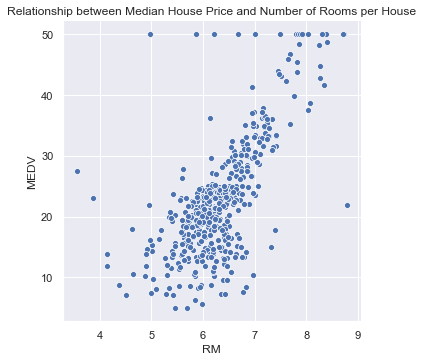

In [15]:
sns.relplot(x="RM", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Number of Rooms per House")

Looking at this plot as per the corrroleation matrix, there is an obvious relationship between the median house price and the number of rooms. The graph shows that the majority of houses have between 5 to 7 rooms and the majority of them fall within the MEDV of 10 to 30 thousand. As the MEDV increases the number of rooms per house also increases. The median house price does appear to be capped at 50,000.

### Using inferential statistics to analyse MEDV and CHAS variables

For this section of the project I would like to use some inforential statistics to analyse wether there is a significant difference in the median house prices (MEDV) between houses that are along the Charles River and those that are not(CHAS).In the dataset houses on the river are marked with 1 and those that are not are marked 0. Making a practical assumption I would expect to see houses with river boundries to have a higher median price than those that do not.

In [16]:
# Creating a dataframe containing just MEDV and CHAS
boston2 = boston.loc[:, ["CHAS", "MEDV"]]

In [17]:
boston2.pivot(columns="CHAS", values="MEDV").describe() # comparison of the descriptive stats between houses on and off the river

CHAS,0.0,1.0
count,471.000000,35.000000
mean,22.093843,28.440000
std,8.831362,11.816643
min,5.000000,13.400000
25%,16.600000,21.100000
50%,20.900000,23.300000
75%,24.800000,33.150000
max,50.000000,50.000000


From the information above we can see there are 35 houses that have a boundry on the Charles River and 471 houses that do not. We can also see as expected that the average MEDV for properties on the river is higher then the properties that do not have a river boundary.

In [18]:
# Splitting into two datasets
on = boston2[boston2["CHAS"] == 1]  # Houses with a river boundary
off = boston2[boston2["CHAS"] == 0] # Houses without a river boundary

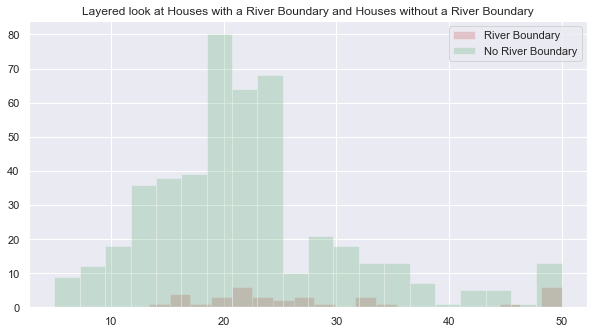

In [19]:
plt.hist(on["MEDV"], bins=20, color='r', alpha=0.25, label="River Boundary")
plt.hist(off["MEDV"], bins=20, color='g', alpha=0.25, label = "No River Boundary")
plt.title("Layered look at Houses with a River Boundary and Houses without a River Boundary")
plt.legend()
plt.show()

To compare the houses on the Charles River and those off the river I will create a sample of data from the population of both datasets. The reason I am doing this is to have a comparision of the same number of houses from both variables.

In [20]:
# Getting a sample of MEDV of 20 houses on the Charles River
a = on["MEDV"].sample(n=20, random_state=1).describe() # Random State is used to reproduce this example

In [21]:
# Getting a sample of MEDV of 20 houses off the Charles River
b = off["MEDV"].sample(n=20, random_state=1).describe() # Random State is used to reproduce this example

#### T-test of the two variables

An independent-samples t-test compares the mean between two unrelated groups on the same continuous, dependant variable. 

There are certain assumptions that need to be made in order for this test to give a valid result.

Assumption 1 - The dependent variable should be measured on a continuous scale. In this case the MEDV is measured from 5,000 to 50,0000

Assumption 2 - The independent variables should consist of two categorical, independent groups. In this case houses with a boundary on the River Charles and houses with no boundary the River Charles.

Assumption 3 - There should be independence of observations which means there is no relationship between the observations  in each group or between the group themselves. The data has been collected for different areas around the boston region so I will make an assumption that there is no conflict here. A house cannot be classed as having a river boundary while at the same time also not having a river boundary.

Assumption 4 - There should be no significat outliers. We have seen in a graph earlier that there are no significant outliers when looking at the MEDV variable especially with the median price capped at 50,000.

Assumptuion 5 - The dependent variable should be approximately normally distrubed. We have seen in an earleir grah the MEDV follows a normal distribution.

Assumption 6 - There needs to be homogenity of variances. I will conduct this check using the stats.levane() methd from scipy stats.

In [22]:
stats.levene(a, b) # Checking the homogenity of variances

LeveneResult(statistic=0.01971710699033926, pvalue=0.890330304726779)

Levannes test checks for homogenity of variances and the null hypothesis is that all variances are equal. A resulting p-value under 0.05 means that variances are not equal. A p-value of greater than 0.05 indicates that there is no significant difference in variances betwween the groups. As the above p-value is greater than 0.05 we can say assumption 6 has been met.

In [23]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=0.3068308608589971, pvalue=0.7634883503894568)

The t-test is a measurement of whether the average (expected) value will differ significantly across the samples provided. The p-value is a score between 0 an 1 which tells us whether or not the difference between our sample observations and our hypothesis is significantly different. 0.05 is the reference value. If the p-value is smaller than 0.05 then the difference is significant. If the differenence of the p-value is greater than 0.05 than the difference is said to not be significant. In this case the p-value is over 0.5 so we can accept the null hypothesise.

Another technique I would like to briefly mention in the analysis of variance is ANOVA. This is esentially an extension to the t-test. The above independent t-test was used to compare the means of a condition between two groups. ANOVA is used to compare the means of a condition between more than two groups. As I was only interested in two groups, houses on the river and houses off the river I have not used ANOVA in this assignment.

### Creating a Neural Network to Predict the Median House Price

For this section of the assignment I plan on using keras to build a neural network to predict the median house price of the dataset. A neural network takes in inputs, which are then processed in hidden layers using weights that are adjusted during training. The model then outputs a prediction. The first thing to do is to split the data into input data and the outpout target data.

In [24]:
inputs = boston.drop(columns=['MEDV']) # This is all of the variables in the set les the Median House Prices

In [25]:
inputs.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [26]:
outputs = boston[["MEDV"]] # The target variable is the Median House Prices (MEDV)

In [27]:
outputs.head(10)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


When  building a neural network with keras a model needs to be chosen. The Sequntial API allows us to create models layer-by-layer for most problems. I will build out my neural network using this model.

#### Build the model

In [28]:
#create model
m = Sequential()

Layers are added to the model and within these layers the number of neurons, number of input data and activation function are added. An output layer is then also added. The activation function allows models to take into account nonlinear relationships. Based on my research it is my understanding that linear, tanh, relu or sigmoid are popular activation functions so I will see which one of those best fits my model. As the dataset is quite small I don't see the need to add anu more than 2 layers.

In [29]:
#add model layers
#m.add(Dense(64, input_dim=13, activation='linear'))
#m.add(Dense(64, input_dim=13, activation='tanh'))
m.add(Dense(24, input_dim=13, activation='relu'))
#m.add(Dense(64, input_dim=13, activation='sigmoid'))

m.add(Dense(24, activation='relu')) 
m.add(Dense(1, activation= 'linear')) # The last layer must be linear or the outputs will be restricted.

Once the layers are added the model can be compiled. This takles two paramaters, optimizers and loss. The optimizer controls the learning rate which determines how fast the optimal weights for the model are calculated. The loss function I will use is the mean_squared error which is calculated by taking the average squared difference between th epredicted and actual values. the closer to zero this is, the better the model performed. I will try adam, sgd and adadelta optimizers to see which one works best with the model.

In [30]:
#compile model

# Keeping the MSE loss compiler for the model  but I will test out a few of the optimizer options.

m.compile(optimizer='Adam', loss='mean_squared_error') 
#m.compile(optimizer='sgd', loss='mean_squared_error') 
#m.compile(optimizer='Adadelta', loss='mean_squared_error')

The next step is to train the model using the fit function. This will take the input data and the output or prediction. The validation split of .2 means that 20% of the training data provided for th emodel will be used for testing model performance. The epcohs are the number of times the model will cycle through the data. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. When training this model it is important that the loss value start moving towards zero. The closer it gets to zero the better the model. From here I will have to play around with keras and try a few varuious different techniques to achieve this, possible adding or removing neurons, changing the activation function on different layers, changing the optimizer when compiling the model etc. 

I have used the relu activation function in the hidden layers and the adam optimiser to compile the model as it seems to run closest to zero using this combination. 

Additionally I have played around with the epochs and batch size. uisng around 1000 epochs and a batch size of 10 gets the value loss down the most.

#### Train the model

The next tep is to spilt the data into training and testing data. I am splitting the data into a training and testing dataset. The test_size of 0.2 indicates that 80% of the data will be for training and 20% for verification testing. 

In [31]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

In [32]:
#train model
m.fit(inputs_train, outputs_train, validation_split=0.2, epochs=500, batch_size=10)

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 449us/step - loss: 631.4271 - val_loss: 140.0258
Epoch 2/500
323/323 [==============================] - 0s 139us/step - loss: 89.7811 - val_loss: 82.7996
Epoch 3/500
323/323 [==============================] - 0s 207us/step - loss: 69.8361 - val_loss: 76.1087
Epoch 4/500
323/323 [==============================] - 0s 207us/step - loss: 66.6883 - val_loss: 74.8158
Epoch 5/500
323/323 [==============================] - 0s 189us/step - loss: 63.2766 - val_loss: 81.7312
Epoch 6/500
323/323 [==============================] - 0s 220us/step - loss: 68.9967 - val_loss: 72.9519
Epoch 7/500
323/323 [==============================] - 0s 149us/step - loss: 62.1801 - val_loss: 68.4807
Epoch 8/500
323/323 [==============================] - 0s 145us/step - loss: 63.9813 - val_loss: 67.1437
Epoch 9/500
323/323 [==============================] - 0s 238us/step - loss: 62.2216 - val_loss: 66.0348
Epoch 10

Epoch 78/500
323/323 [==============================] - 0s 142us/step - loss: 26.4720 - val_loss: 32.5694
Epoch 79/500
323/323 [==============================] - 0s 149us/step - loss: 26.6329 - val_loss: 31.9373
Epoch 80/500
323/323 [==============================] - 0s 145us/step - loss: 26.0153 - val_loss: 30.6836
Epoch 81/500
323/323 [==============================] - 0s 164us/step - loss: 32.1862 - val_loss: 39.7316
Epoch 82/500
323/323 [==============================] - 0s 142us/step - loss: 27.6037 - val_loss: 28.2355
Epoch 83/500
323/323 [==============================] - 0s 142us/step - loss: 27.5925 - val_loss: 29.2822
Epoch 84/500
323/323 [==============================] - 0s 127us/step - loss: 32.8781 - val_loss: 43.7316
Epoch 85/500
323/323 [==============================] - 0s 133us/step - loss: 28.1133 - val_loss: 32.8494
Epoch 86/500
323/323 [==============================] - 0s 161us/step - loss: 33.5846 - val_loss: 29.1582
Epoch 87/500
323/323 [========================

Epoch 155/500
323/323 [==============================] - 0s 145us/step - loss: 17.2573 - val_loss: 26.8900
Epoch 156/500
323/323 [==============================] - 0s 139us/step - loss: 19.3345 - val_loss: 31.2813
Epoch 157/500
323/323 [==============================] - 0s 139us/step - loss: 22.4654 - val_loss: 19.6109
Epoch 158/500
323/323 [==============================] - 0s 158us/step - loss: 15.3794 - val_loss: 24.4971
Epoch 159/500
323/323 [==============================] - 0s 158us/step - loss: 20.7835 - val_loss: 20.3939
Epoch 160/500
323/323 [==============================] - 0s 155us/step - loss: 16.1547 - val_loss: 22.8755
Epoch 161/500
323/323 [==============================] - 0s 133us/step - loss: 15.8633 - val_loss: 21.1178
Epoch 162/500
323/323 [==============================] - 0s 167us/step - loss: 16.4537 - val_loss: 18.5268
Epoch 163/500
323/323 [==============================] - 0s 173us/step - loss: 16.2193 - val_loss: 30.0783
Epoch 164/500
323/323 [==============

323/323 [==============================] - 0s 127us/step - loss: 13.2277 - val_loss: 19.3237
Epoch 232/500
323/323 [==============================] - 0s 145us/step - loss: 14.3132 - val_loss: 18.0984
Epoch 233/500
323/323 [==============================] - 0s 145us/step - loss: 13.1082 - val_loss: 18.0030
Epoch 234/500
323/323 [==============================] - 0s 152us/step - loss: 12.5267 - val_loss: 16.2415
Epoch 235/500
323/323 [==============================] - 0s 164us/step - loss: 10.9270 - val_loss: 18.1969
Epoch 236/500
323/323 [==============================] - 0s 142us/step - loss: 12.8180 - val_loss: 21.8435
Epoch 237/500
323/323 [==============================] - 0s 192us/step - loss: 15.1216 - val_loss: 17.0509
Epoch 238/500
323/323 [==============================] - 0s 149us/step - loss: 14.8730 - val_loss: 22.7979
Epoch 239/500
323/323 [==============================] - 0s 139us/step - loss: 16.4640 - val_loss: 16.7467
Epoch 240/500
323/323 [============================

323/323 [==============================] - 0s 149us/step - loss: 11.1345 - val_loss: 21.7734
Epoch 308/500
323/323 [==============================] - 0s 133us/step - loss: 10.8438 - val_loss: 19.3665
Epoch 309/500
323/323 [==============================] - 0s 145us/step - loss: 20.1631 - val_loss: 15.2396
Epoch 310/500
323/323 [==============================] - 0s 145us/step - loss: 13.5745 - val_loss: 24.7944
Epoch 311/500
323/323 [==============================] - 0s 145us/step - loss: 13.9343 - val_loss: 15.7230
Epoch 312/500
323/323 [==============================] - 0s 158us/step - loss: 11.9927 - val_loss: 18.0731
Epoch 313/500
323/323 [==============================] - 0s 142us/step - loss: 9.9425 - val_loss: 19.1040
Epoch 314/500
323/323 [==============================] - 0s 158us/step - loss: 10.0140 - val_loss: 18.0130
Epoch 315/500
323/323 [==============================] - 0s 189us/step - loss: 11.1454 - val_loss: 15.3140
Epoch 316/500
323/323 [=============================

Epoch 384/500
323/323 [==============================] - 0s 183us/step - loss: 9.5731 - val_loss: 15.2654
Epoch 385/500
323/323 [==============================] - 0s 158us/step - loss: 8.9669 - val_loss: 15.3068
Epoch 386/500
323/323 [==============================] - 0s 130us/step - loss: 9.9837 - val_loss: 24.5137
Epoch 387/500
323/323 [==============================] - 0s 204us/step - loss: 13.3245 - val_loss: 16.5682
Epoch 388/500
323/323 [==============================] - 0s 127us/step - loss: 9.5815 - val_loss: 19.7476
Epoch 389/500
323/323 [==============================] - 0s 124us/step - loss: 9.3755 - val_loss: 16.9025
Epoch 390/500
323/323 [==============================] - 0s 170us/step - loss: 9.1483 - val_loss: 22.5729
Epoch 391/500
323/323 [==============================] - 0s 170us/step - loss: 13.2529 - val_loss: 19.1887
Epoch 392/500
323/323 [==============================] - 0s 229us/step - loss: 9.5911 - val_loss: 19.3470
Epoch 393/500
323/323 [=====================

323/323 [==============================] - 0s 294us/step - loss: 9.8684 - val_loss: 14.9602
Epoch 462/500
323/323 [==============================] - 0s 269us/step - loss: 9.6098 - val_loss: 18.4188
Epoch 463/500
323/323 [==============================] - 0s 263us/step - loss: 8.6398 - val_loss: 14.5959
Epoch 464/500
323/323 [==============================] - 0s 220us/step - loss: 10.6452 - val_loss: 18.0390
Epoch 465/500
323/323 [==============================] - 0s 214us/step - loss: 9.3731 - val_loss: 24.8767
Epoch 466/500
323/323 [==============================] - 0s 167us/step - loss: 9.8830 - val_loss: 18.1880
Epoch 467/500
323/323 [==============================] - 0s 167us/step - loss: 8.5784 - val_loss: 20.0293
Epoch 468/500
323/323 [==============================] - 0s 213us/step - loss: 8.7049 - val_loss: 19.3230
Epoch 469/500
323/323 [==============================] - 0s 223us/step - loss: 11.4981 - val_loss: 18.7122
Epoch 470/500
323/323 [==============================] - 0

#### Predicing the Median House Price

In [33]:
m.predict(inputs_test).round().T # Predictions from my neural network

array([[26., 42., 25., 26., 19., 15., 21., 27., 20., 28., 56., 31., 23.,
        19., 21., 11., 19., 20., 27., 21.,  8., 12., 20., 20., 25., 21.,
        20., 21., 23., 16., 25., 19.,  9., 48., 34., 14., 29., 19., 18.,
        12., 18., 41., 25., 48., 22., 18., 27., 21., 16., 50., 26., 18.,
        14., 31., 42., 26., 22., 22., 22., 19., 16., 19., 15., 14., 19.,
        22., 16., 25., 36., 22., 23., 15., 22., 18., 13., 23., 26., 37.,
        16., 21., 44., 46., 23., 22., 20., 16., 24., 15., 14., 27., 13.,
        19., 22., 13., 33., 25., 17., 26., 31., 22., 38., 27.]],
      dtype=float32)

In [34]:
outputs_test.as_matrix().T # Actual output values

C:\Users\I304302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[22.6, 46. , 31.5, 22. , 20.4, 15.7, 21.4, 29. , 24.5, 29.9, 50. ,
        28.2, 23.7, 16.2, 22.7, 13.8, 21.7, 18.3, 23.3, 19.3, 13.8,  6.3,
        22.9, 19.9, 22.8, 20.8, 19.3, 21.4, 23.4, 13. , 24.4, 20.3,  7.4,
        21.9, 34.9, 15.1, 15.6, 19.4, 19.5, 11. , 20.5, 37.9, 24.7, 50. ,
        20.7, 15.3, 24.5, 24.3, 14.9, 50. , 26.6, 19.6, 17.8, 28.7, 37.6,
        46.7, 21.4, 23.1, 23. , 18.5, 18.3, 18.7, 14.1, 19.1, 17.5, 20.1,
        20.1, 20.8, 36.2, 23.3, 20.6, 14.3, 26.4, 19.9, 16.1, 22.6, 31.2,
        27. , 19.6, 15.6, 37.2, 43.5, 25. , 22.9, 20.4, 14.4, 25.3, 17.4,
        14.5, 42.8, 14.8, 22.3, 23.7, 11.7, 24. , 33.1, 16. , 22. , 28.7,
        19.8, 32.5, 25. ]])

#### Evaluating the data

In [35]:
m.evaluate(inputs_test, outputs_test) # Calculating the loss function

102/102 [==============================] - 0s 78us/step


24.334276592030246

In relation to the calculated loss function, the higher the value the worse the model is doing. I will try to build out the model again using some techniques to improve the data for the model.

#### Building the model again after normalising the data

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. I will normalise the dataset and perhaps add whitening to try and get the model to return a more accurate prediction.

In [36]:
inputsscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns) # One off scaling
inputsscale.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


In [37]:
# Scaling the data
scaler = pre.StandardScaler() # code adapted from https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
inputsscale = pd.DataFrame(scaler.transform(inputs), columns=inputs.columns) # normalizing the datframe
inputsscale.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


In [39]:
#create model
m = Sequential()

#add model layers
m.add(Dense(24, input_dim=13, activation='relu'))
m.add(Dense(24, activation='relu')) 
m.add(Dense(1, activation= 'linear')) # The last layer must be linear or the outputs will be restricted.

#compile model
m.compile(optimizer='Adam', loss='mean_squared_error') 

#### Training the model after normalising the data

In [40]:
#train model
m.fit(inputs, outputs, validation_split=0.2, epochs=500, batch_size=10)

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 0s 460us/step - loss: 246.3245 - val_loss: 1400.7667
Epoch 2/500
404/404 [==============================] - 0s 156us/step - loss: 88.6612 - val_loss: 845.6766
Epoch 3/500
404/404 [==============================] - 0s 215us/step - loss: 78.3990 - val_loss: 658.4180
Epoch 4/500
404/404 [==============================] - 0s 134us/step - loss: 72.8104 - val_loss: 469.8633
Epoch 5/500
404/404 [==============================] - 0s 134us/step - loss: 71.9766 - val_loss: 360.1706
Epoch 6/500
404/404 [==============================] - 0s 121us/step - loss: 68.5230 - val_loss: 372.4230
Epoch 7/500
404/404 [==============================] - 0s 119us/step - loss: 65.4984 - val_loss: 231.2055
Epoch 8/500
404/404 [==============================] - 0s 116us/step - loss: 64.9420 - val_loss: 181.2515
Epoch 9/500
404/404 [==============================] - 0s 136us/step - loss: 64.0874 - val_loss: 191.593

404/404 [==============================] - 0s 114us/step - loss: 22.7556 - val_loss: 124.2610
Epoch 78/500
404/404 [==============================] - 0s 109us/step - loss: 21.2327 - val_loss: 81.4680
Epoch 79/500
404/404 [==============================] - 0s 109us/step - loss: 21.1618 - val_loss: 134.2287
Epoch 80/500
404/404 [==============================] - 0s 111us/step - loss: 21.2017 - val_loss: 113.2287
Epoch 81/500
404/404 [==============================] - 0s 109us/step - loss: 19.8929 - val_loss: 152.4234
Epoch 82/500
404/404 [==============================] - 0s 119us/step - loss: 21.8992 - val_loss: 99.9035
Epoch 83/500
404/404 [==============================] - 0s 126us/step - loss: 20.6316 - val_loss: 103.7085
Epoch 84/500
404/404 [==============================] - 0s 143us/step - loss: 25.7867 - val_loss: 114.5523
Epoch 85/500
404/404 [==============================] - 0s 156us/step - loss: 19.8133 - val_loss: 130.8204
Epoch 86/500
404/404 [==============================

404/404 [==============================] - 0s 106us/step - loss: 16.6780 - val_loss: 162.5711
Epoch 154/500
404/404 [==============================] - 0s 111us/step - loss: 15.7207 - val_loss: 216.2227
Epoch 155/500
404/404 [==============================] - 0s 114us/step - loss: 16.0716 - val_loss: 192.9004
Epoch 156/500
404/404 [==============================] - 0s 119us/step - loss: 15.7607 - val_loss: 234.9164
Epoch 157/500
404/404 [==============================] - 0s 109us/step - loss: 15.0538 - val_loss: 245.1737
Epoch 158/500
404/404 [==============================] - 0s 109us/step - loss: 15.2668 - val_loss: 181.9984
Epoch 159/500
404/404 [==============================] - 0s 109us/step - loss: 15.6221 - val_loss: 233.6482
Epoch 160/500
404/404 [==============================] - 0s 116us/step - loss: 14.4936 - val_loss: 257.4306
Epoch 161/500
404/404 [==============================] - 0s 119us/step - loss: 15.2938 - val_loss: 199.9405
Epoch 162/500
404/404 [===================

Epoch 229/500
404/404 [==============================] - 0s 111us/step - loss: 13.7472 - val_loss: 329.8937
Epoch 230/500
404/404 [==============================] - 0s 111us/step - loss: 13.4066 - val_loss: 340.3760
Epoch 231/500
404/404 [==============================] - 0s 109us/step - loss: 13.2898 - val_loss: 485.6918
Epoch 232/500
404/404 [==============================] - ETA: 0s - loss: 5.808 - 0s 114us/step - loss: 15.8460 - val_loss: 349.4015
Epoch 233/500
404/404 [==============================] - 0s 111us/step - loss: 14.6300 - val_loss: 357.5173
Epoch 234/500
404/404 [==============================] - 0s 331us/step - loss: 13.2519 - val_loss: 445.1401
Epoch 235/500
404/404 [==============================] - 0s 265us/step - loss: 15.1273 - val_loss: 266.8138
Epoch 236/500
404/404 [==============================] - 0s 163us/step - loss: 12.0081 - val_loss: 298.8419
Epoch 237/500
404/404 [==============================] - 0s 146us/step - loss: 12.4576 - val_loss: 350.0407
Epoc

404/404 [==============================] - 0s 126us/step - loss: 12.9366 - val_loss: 420.5136
Epoch 305/500
404/404 [==============================] - 0s 134us/step - loss: 11.1723 - val_loss: 433.1807
Epoch 306/500
404/404 [==============================] - 0s 136us/step - loss: 10.6614 - val_loss: 501.6554
Epoch 307/500
404/404 [==============================] - 0s 114us/step - loss: 11.2064 - val_loss: 501.5105
Epoch 308/500
404/404 [==============================] - 0s 114us/step - loss: 10.6339 - val_loss: 324.2421
Epoch 309/500
404/404 [==============================] - 0s 111us/step - loss: 14.2445 - val_loss: 772.6315
Epoch 310/500
404/404 [==============================] - 0s 111us/step - loss: 10.4047 - val_loss: 378.3272
Epoch 311/500
404/404 [==============================] - 0s 109us/step - loss: 9.7432 - val_loss: 363.1460
Epoch 312/500
404/404 [==============================] - 0s 109us/step - loss: 11.8894 - val_loss: 395.4819
Epoch 313/500
404/404 [====================

Epoch 380/500
404/404 [==============================] - 0s 114us/step - loss: 9.5582 - val_loss: 547.8240
Epoch 381/500
404/404 [==============================] - 0s 143us/step - loss: 9.3192 - val_loss: 598.2710
Epoch 382/500
404/404 [==============================] - 0s 141us/step - loss: 10.0457 - val_loss: 588.8319
Epoch 383/500
404/404 [==============================] - 0s 146us/step - loss: 9.1368 - val_loss: 537.7065
Epoch 384/500
404/404 [==============================] - 0s 139us/step - loss: 9.8040 - val_loss: 425.7327
Epoch 385/500
404/404 [==============================] - 0s 124us/step - loss: 10.9985 - val_loss: 650.8083
Epoch 386/500
404/404 [==============================] - 0s 139us/step - loss: 13.9174 - val_loss: 499.6496
Epoch 387/500
404/404 [==============================] - 0s 124us/step - loss: 9.9895 - val_loss: 678.0613
Epoch 388/500
404/404 [==============================] - 0s 151us/step - loss: 10.4903 - val_loss: 368.5618
Epoch 389/500
404/404 [==========

404/404 [==============================] - 0s 139us/step - loss: 7.5922 - val_loss: 487.7728
Epoch 457/500
404/404 [==============================] - 0s 141us/step - loss: 7.0131 - val_loss: 492.3226
Epoch 458/500
404/404 [==============================] - 0s 136us/step - loss: 8.0538 - val_loss: 484.1411
Epoch 459/500
404/404 [==============================] - 0s 141us/step - loss: 7.8890 - val_loss: 478.0210
Epoch 460/500
404/404 [==============================] - 0s 151us/step - loss: 7.0715 - val_loss: 590.0087
Epoch 461/500
404/404 [==============================] - 0s 126us/step - loss: 7.4322 - val_loss: 461.4901
Epoch 462/500
404/404 [==============================] - 0s 121us/step - loss: 7.3917 - val_loss: 550.1360
Epoch 463/500
404/404 [==============================] - 0s 171us/step - loss: 7.6654 - val_loss: 534.2241
Epoch 464/500
404/404 [==============================] - 0s 339us/step - loss: 7.5258 - val_loss: 518.7882
Epoch 465/500
404/404 [============================

#### Predicting the Median House Price after normalizing the data

In [41]:
m.predict(inputs_test).round().T # Predictions from my neural network

array([[23., 44., 33., 23., 18., 15., 17., 29., 20., 27., 52., 30., 25.,
        19., 22., 14., 18., 19., 25., 21.,  9.,  7., 20., 20., 23., 20.,
        20., 21., 22., 27., 25., 20.,  9., 25., 36., 13., 16., 21., 16.,
        20., 18., 38., 24., 47., 22., 18., 26., 21., 28., 50., 26., 19.,
        14., 30., 42., 39., 20., 21., 20., 19., 17., 18., 31.,  7., 19.,
        21., 16., 25., 34., 22., 14., 21., 24., 16., 20., 23., 26., 26.,
        18., 15., 39., 46., 25., 21., 20., 16., 23., 18., 27., 33., 13.,
        20., 22., 42., 28., 30., 17., 24., 28., 20., 36., 26.]],
      dtype=float32)

In [42]:
outputs_test.as_matrix().T # Actual output values

C:\Users\I304302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[22.6, 46. , 31.5, 22. , 20.4, 15.7, 21.4, 29. , 24.5, 29.9, 50. ,
        28.2, 23.7, 16.2, 22.7, 13.8, 21.7, 18.3, 23.3, 19.3, 13.8,  6.3,
        22.9, 19.9, 22.8, 20.8, 19.3, 21.4, 23.4, 13. , 24.4, 20.3,  7.4,
        21.9, 34.9, 15.1, 15.6, 19.4, 19.5, 11. , 20.5, 37.9, 24.7, 50. ,
        20.7, 15.3, 24.5, 24.3, 14.9, 50. , 26.6, 19.6, 17.8, 28.7, 37.6,
        46.7, 21.4, 23.1, 23. , 18.5, 18.3, 18.7, 14.1, 19.1, 17.5, 20.1,
        20.1, 20.8, 36.2, 23.3, 20.6, 14.3, 26.4, 19.9, 16.1, 22.6, 31.2,
        27. , 19.6, 15.6, 37.2, 43.5, 25. , 22.9, 20.4, 14.4, 25.3, 17.4,
        14.5, 42.8, 14.8, 22.3, 23.7, 11.7, 24. , 33.1, 16. , 22. , 28.7,
        19.8, 32.5, 25. ]])

#### Evaluating the data after normalising

In [43]:
m.evaluate(inputs_test, outputs_test) # Calculating the loss function

102/102 [==============================] - 0s 49us/step


26.117462008607152

#### Whitening the data

In [44]:
pca = dec.PCA(n_components=13, whiten=True) # Fitting using Principle Components Analysis
pca.fit(inputs)
inputswhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns) 
inputswhite.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021
5,-1.075078,0.236901,-0.576298,-0.694113,0.205287,-1.196537,-0.784717,0.364263,0.673839,1.176955,0.414446,-0.191945,0.432912
6,-0.593644,-0.110494,-0.258006,0.113139,-0.022475,0.178375,-0.353236,0.194789,-1.356128,1.726317,0.629017,-0.421871,-0.163596
7,-0.580889,-0.127854,-1.059722,1.282305,0.019102,0.694912,-1.165460,0.411314,-1.220748,2.635746,-0.297178,-0.446479,-0.626864
8,-0.560599,-0.003136,-1.189201,1.461642,0.339630,2.420868,-2.171006,0.515493,-1.585299,2.651310,-0.610550,-0.276093,-0.943811
9,-0.569145,-0.004018,-0.774196,0.876559,-0.004038,0.552682,-0.921533,0.366581,-1.168989,3.010844,0.123235,-0.401419,-0.293907


In [45]:
inputswhite.corr().round() # Checking to see if correlations are zero or one
#inputswhite.mean().round() # Checking to see if correlations are zero or one
#inputswhite.std().round()  # # Checking to see if correlations are zero or one

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
CHAS,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
NOX,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
RM,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
AGE,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
DIS,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0
RAD,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0


#### Building the model after whitening the data

In [46]:
#create model
m = Sequential()

#add model layers
m.add(Dense(24, input_dim=13, activation='relu'))
m.add(Dense(24, activation='relu')) 
m.add(Dense(1, activation= 'linear')) # The last layer must be linear or the outputs will be restricted.

#compile model
m.compile(optimizer='Adam', loss='mean_squared_error') 

#### Predicting the Median House Price after whitening

In [47]:
m.predict(inputs_test).round().T # Predictions from my neural network

array([[38., 33., 46., 39., 50., 30., 81., 46., 44., 41., 82., 34., 43.,
        42., 52., 48., 38., 51., 51., 38., 85., 79., 41., 44., 47., 54.,
        56., 33., 38., 77., 35., 41., 84., 78., 37., 83., 37., 41., 82.,
        50., 42., 33., 39., 34., 37., 52., 36., 46., 78., 81., 40., 82.,
        51., 36., 42., 46., 38., 54., 81., 40., 55., 55., 47., 78., 51.,
        30., 84., 81., 35., 42., 78., 49., 46., 82., 49., 41., 48., 52.,
        51., 48., 35., 37., 41., 40., 44., 34., 39., 51., 47., 48., 39.,
        51., 81., 32., 39., 46., 36., 38., 39., 56., 33., 38.]],
      dtype=float32)

In [48]:
outputs_test.as_matrix().T # Actual output values

C:\Users\I304302\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[22.6, 46. , 31.5, 22. , 20.4, 15.7, 21.4, 29. , 24.5, 29.9, 50. ,
        28.2, 23.7, 16.2, 22.7, 13.8, 21.7, 18.3, 23.3, 19.3, 13.8,  6.3,
        22.9, 19.9, 22.8, 20.8, 19.3, 21.4, 23.4, 13. , 24.4, 20.3,  7.4,
        21.9, 34.9, 15.1, 15.6, 19.4, 19.5, 11. , 20.5, 37.9, 24.7, 50. ,
        20.7, 15.3, 24.5, 24.3, 14.9, 50. , 26.6, 19.6, 17.8, 28.7, 37.6,
        46.7, 21.4, 23.1, 23. , 18.5, 18.3, 18.7, 14.1, 19.1, 17.5, 20.1,
        20.1, 20.8, 36.2, 23.3, 20.6, 14.3, 26.4, 19.9, 16.1, 22.6, 31.2,
        27. , 19.6, 15.6, 37.2, 43.5, 25. , 22.9, 20.4, 14.4, 25.3, 17.4,
        14.5, 42.8, 14.8, 22.3, 23.7, 11.7, 24. , 33.1, 16. , 22. , 28.7,
        19.8, 32.5, 25. ]])

In [51]:
m.evaluate(inputs_test, outputs_test) # Calculating the loss function

102/102 [==============================] - 0s 78us/step


1096.5344148523668

In [50]:
#plt.scatter(outputs_test, outputs_pred, c = 'blue') 
#plt.xlabel("Price: in $1000's") 
#plt.ylabel("Predicted value") 
#plt.title("True value vs predicted value : Linear Regression") 
#plt.show() 

In [ ]:
outputs_predictions = model.predict(inputs)

### References

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html - Information on Boston House Prices dataset

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 - Information on Boston House Prices dataset including correlation matrix

https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d - 
Information on Boston House Prices dataset

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php Information on t-tests

https://biostats.w.uib.no/test-for-homogeneity-of-variances-levenes-test/ Information on homogeneity of variance

https://pythonfordatascience.org/independent-t-test-python/#t_test-assumptions Information on t-tests

https://towardsdatascience.com/an-intuitive-explanation-of-hypothesis-testing-and-p-values-8391db2c90f  Information on P-value

https://pythonfordatascience.org/anova-python/ Information on ANOVA

https://keras.io/ Information on keras

https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html Information on Tensorflow

https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37 Information on Keras

https://keras.io/#getting-started-30-seconds-to-keras information on Keras

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ Information on epochs

https://machinelearningmastery.com/keras-functional-api-deep-learning/ Information on Sequential models

https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37 Information on optimizers

https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/ More on optimizers

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/ Information on batch sizes

https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f Information on activation 
functions

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing Information on standardization.

In [ ]:
pre.scale(inputs)

In [ ]:
inputsscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputsscale.head(10)

In [ ]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

In [ ]:
(inputs - inputs.mean()) / inputs.std(0)